# Heart Failure Prediction using Support Vector Machine

The Heart Failure Clinical Records dataset contains 12 features collected from 299 patients with heart failure. These features include various clinical measurements like age, ejection fraction, serum creatinine, and time, which are used to predict whether the patient survived heart failure (the target variable is DEATH_EVENT). The dataset was sourced from a public clinical study, primarily focusing on cardiovascular diseases, and was shared by Andrew MVD on Kaggle. It aims to facilitate research in predicting heart failure outcomes using machine learning models.

### Dataset Description

- **Age**: Age of the patient (years).
- **Anaemia**: Presence of a reduction in red blood cells (1 = Yes, 0 = No).
- **Creatinine Phosphokinase (CPK)**: Level of CPK enzyme in blood (mcg/L).
- **Diabetes**: Indicates if the patient has diabetes (1 = Yes, 0 = No).
- **Ejection Fraction**: Percentage of blood leaving the heart each contraction (%).
- **High Blood Pressure**: If the patient has hypertension (1 = Yes, 0 = No).
- **Platelets**: Platelets count in blood (kiloplatelets/mL).
- **Serum Creatinine**: Level of creatinine in the blood (mg/dL).
- **Serum Sodium**: Sodium level in the blood (mEq/L).
- **Sex**: Gender of the patient (1 = Male, 0 = Female).
- **Smoking**: Whether the patient smokes (1 = Yes, 0 = No).
- **Time**: Follow-up period (days).
- **Death Event**: Whether the patient died during the follow-up period (1 = Yes, 0 = No).

Source: [Kaggle Heart Failure Dataset](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data)


## Importing Libraries

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


## Load Data

In [46]:
with open('../data/dataset-metadata.json', 'r') as file:
    metadata = json.load(file)

print(json.dumps(metadata, indent=4))

{
    "id": "andrewmvd/heart-failure-clinical-data",
    "id_no": 727551,
    "datasetSlugNullable": "heart-failure-clinical-data",
    "ownerUserNullable": "andrewmvd",
    "usabilityRatingNullable": 1.0,
    "titleNullable": "Heart Failure Prediction",
    "subtitleNullable": "12 clinical features por predicting death events.",
    "descriptionNullable": "# About this dataset\n&gt; Cardiovascular diseases (CVDs) are the **number 1 cause of death globally**, taking an estimated **17.9 million lives each year**, which accounts for **31% of all deaths worlwide**.\nHeart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.\n\n&gt; Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.\n\n&gt; People with cardiovascular disease or who are at high card

In [47]:
HFP_df = pd.read_csv('../data/heart_failure_clinical_records_dataset.csv')
HFP_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [48]:
print(HFP_df.shape)
print(f"Heart Failure Prediction Dataset: \nconsists of {HFP_df.shape[0]} rows and {HFP_df.shape[1]} columns")

(299, 13)
Heart Failure Prediction Dataset: 
consists of 299 rows and 13 columns


In [49]:
HFP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [50]:
HFP_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [51]:
print(HFP_df['DEATH_EVENT'].value_counts())

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64


## Data Preprocessing

In [52]:
HFP_df_processed = HFP_df.copy()
HFP_df_processed.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


#### Checking Null Values

In [53]:
HFP_df_processed.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### Checking NaN Values

In [54]:
HFP_df_processed.isna().sum()


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### Splitting the dataset into training and test sets

In [55]:
# Assuming df is your DataFrame and 'DEATH_EVENT' is the target column
X = HFP_df_processed.drop('DEATH_EVENT', axis=1)
y = HFP_df_processed['DEATH_EVENT']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Balancing out the value count of DEATH_EVENT using SMOTE (Synthetic Minority Over-sampling Technique)

In [56]:
print(f"Dataset DEATH_EVENT value counts: \n{HFP_df['DEATH_EVENT'].value_counts()}")
print(f"\nTraining set DEATH_EVENT value counts: \n{y_train.value_counts()}")

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check class distribution after applying SMOTE
print(f"\nTraining set DEATH_EVENT value counts after SMOTE: \n{y_train_res.value_counts()}")


Dataset DEATH_EVENT value counts: 
DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

Training set DEATH_EVENT value counts: 
DEATH_EVENT
0    168
1     71
Name: count, dtype: int64

Training set DEATH_EVENT value counts after SMOTE: 
DEATH_EVENT
1    168
0    168
Name: count, dtype: int64


#### Scaling the data using StandardScaler

In [57]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train_res)

# Transform the test data (do not fit again!)
X_test_scaled = scaler.transform(X_test)


## Model Training

In [58]:
# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train_scaled, y_train_res)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)



## Model Evaluation

In [59]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[32  3]
 [11 14]]
              precision    recall  f1-score   support

           0       0.74      0.91      0.82        35
           1       0.82      0.56      0.67        25

    accuracy                           0.77        60
   macro avg       0.78      0.74      0.74        60
weighted avg       0.78      0.77      0.76        60



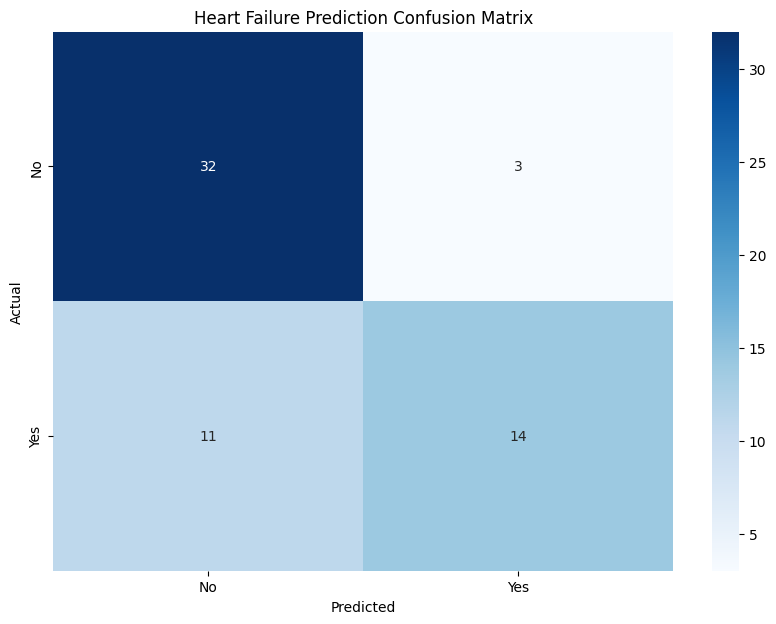

In [60]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heart Failure Prediction Confusion Matrix')
plt.show()

In [61]:
def predict_new_patient(scaler, svm_model, new_patient_data):
    """
    Scale the new patient data and make predictions using the trained SVM model.
    
    Parameters:
    - scaler: The fitted scaler used for scaling the data.
    - svm_model: The trained SVM model for making predictions.
    - new_patient_data: A DataFrame containing the new patient's data.
    
    Returns:
    - Predictions for the new patient data.
    """
    # Scale the new data using the same scaler
    new_data_scaled = scaler.transform(new_patient_data)

    # Make predictions
    predictions = svm_model.predict(new_data_scaled)

    return predictions

# Example usage
new_data = pd.DataFrame({
    'age': [60],
    'anaemia': [0],
    'creatinine_phosphokinase': [250],
    'diabetes': [1],
    'ejection_fraction': [35],
    'high_blood_pressure': [0],
    'platelets': [250000],
    'serum_creatinine': [1.1],
    'serum_sodium': [137],
    'sex': [1],
    'smoking': [0],
    'time': [100]
})

# Call the function to get predictions
new_predictions = predict_new_patient(scaler, svm_model, new_data)

# Output the predictions
print(new_predictions)


[0]
